In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#manggil file 
df = pd.read_csv("sales.csv")

In [3]:
df_hk = df[df["store"] == "Hell's Kitchen"]

df_hk.head()
#ngambil yg hell's kitchen


,order_id,date,store,product,quantity,sales
17,18,01/01/2023,Hell's Kitchen,Brewed herbal tea,1,2.50
18,19,01/01/2023,Hell's Kitchen,Hot chocolate,2,9.00
19,20,01/01/2023,Hell's Kitchen,Hot chocolate,1,4.75
20,21,01/01/2023,Hell's Kitchen,Gourmet brewed coffee,2,7.00
23,24,01/01/2023,Hell's Kitchen,Brewed Chai tea,1,2.55


In [4]:
df_hk.info()
#liat kolom, jmlh baris, ama tipe data

<class 'pandas.core.frame.DataFrame'>
Index: 50735 entries, 17 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  50735 non-null  int64  
 1   date      50735 non-null  object 
 2   store     50735 non-null  object 
 3   product   50735 non-null  object 
 4   quantity  50735 non-null  int64  
 5   sales     50735 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ MB


In [5]:
df_hk.isnull().sum()
#ini cek ada data kosong gak

order_id    0
date        0
store       0
product     0
quantity    0
sales       0
dtype: int64

In [6]:
df_hk.shape

(50735, 6)

In [7]:
df_hk.describe()
#ini yang statistik dasar bagian kolom sales

,order_id,quantity,sales
count,50735.000000,50735.000000,50735.000000
mean,74411.727762,1.413955,4.661696
std,43056.810596,0.500879,5.839339
min,18.000000,1.000000,0.800000
25%,37444.500000,1.000000,3.000000
50%,74010.000000,1.000000,3.750000
75%,111983.500000,2.000000,6.000000
max,149456.000000,8.000000,360.000000


In [8]:
df_hk.sales.describe()

count    50735.000000
mean         4.661696
std          5.839339
min          0.800000
25%          3.000000
50%          3.750000
75%          6.000000
max        360.000000
Name: sales, dtype: float64

In [9]:
df_hk.skew(numeric_only=True)

order_id     0.003823
quantity     0.777495
sales       45.184597
dtype: float64

In [10]:
df_hk.kurtosis(numeric_only=True)

order_id      -1.201889
quantity       3.939924
sales       2704.520319
dtype: float64

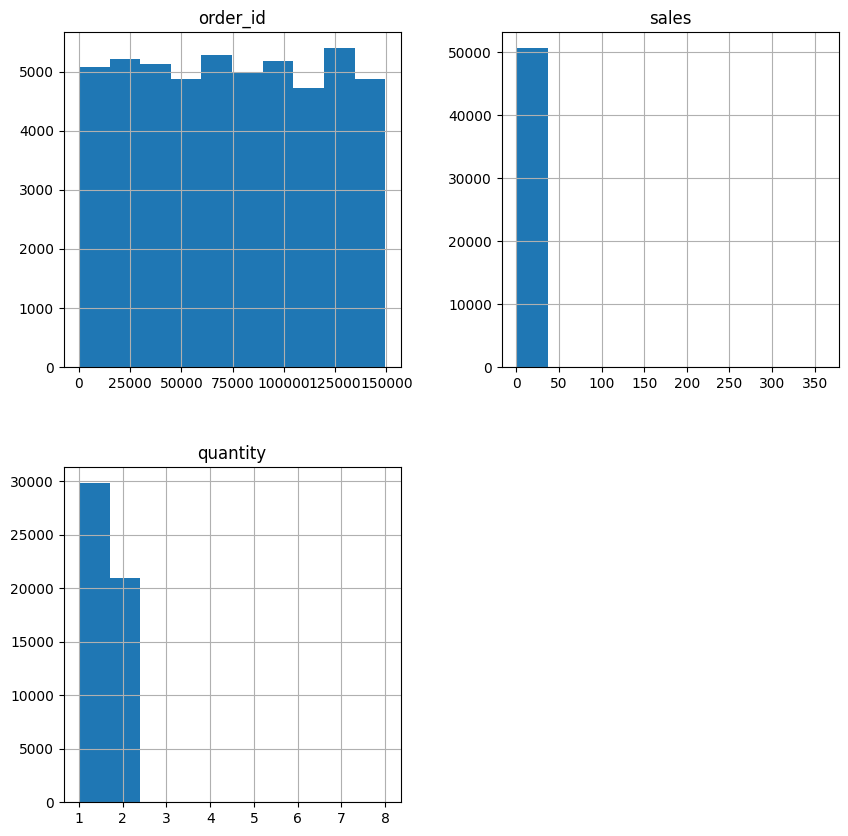

In [11]:
features = ["order_id", "sales", "quantity"]

df_hk[features].hist(figsize=(10,10))
plt.show()


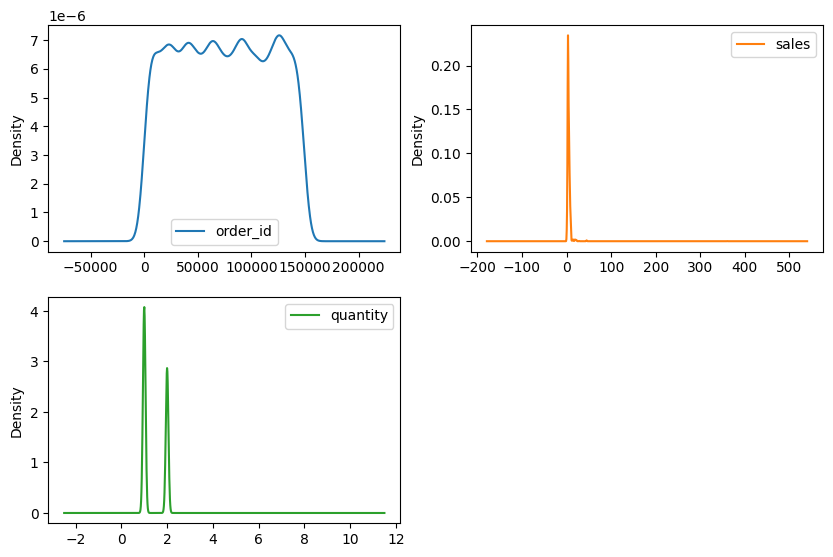

In [12]:
df_hk[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10))
plt.show()

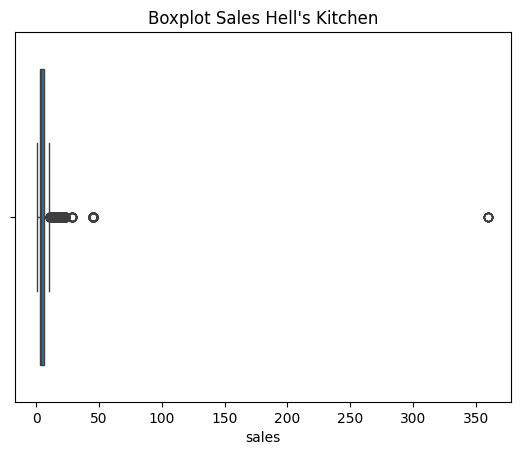

In [13]:
sns.boxplot(x="sales", data=df_hk)
plt.title("Boxplot Sales Hell's Kitchen")
plt.show()

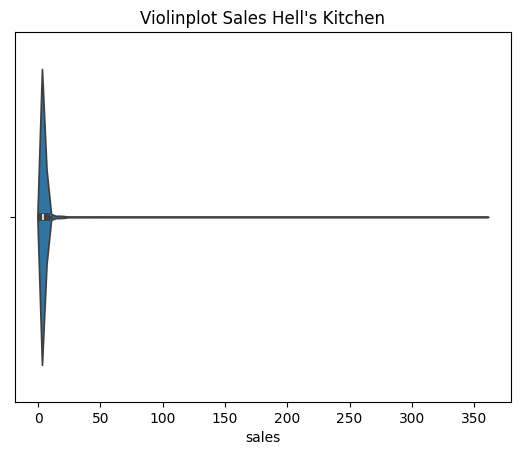

In [14]:
sns.violinplot(x="sales", data=df_hk)
plt.title("Violinplot Sales Hell's Kitchen")
plt.show()

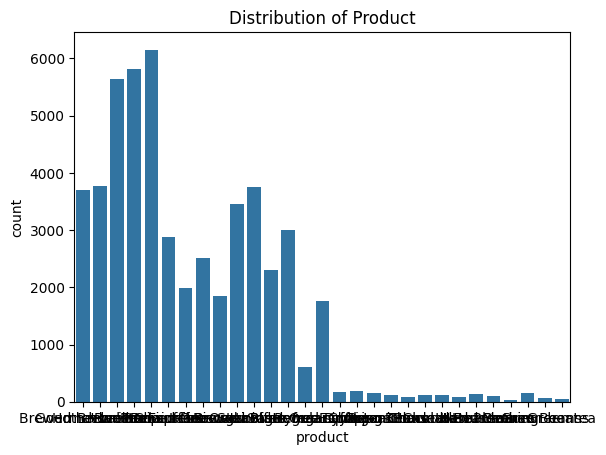

In [15]:
sns.countplot(x="product", data=df_hk)
plt.title("Distribution of Product")
plt.show()

In [16]:
df_hk.corr(numeric_only=True)

,order_id,quantity,sales
order_id,1.000000,-0.004032,0.005413
quantity,-0.004032,1.000000,0.334302
sales,0.005413,0.334302,1.000000


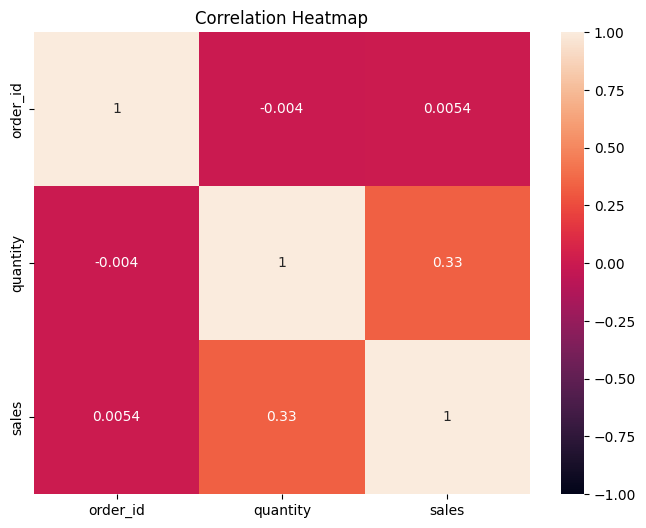

In [17]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(
    df_hk.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=True
)

heatmap.set_title("Correlation Heatmap")
plt.show()

<Axes: xlabel='quantity', ylabel='sales'>

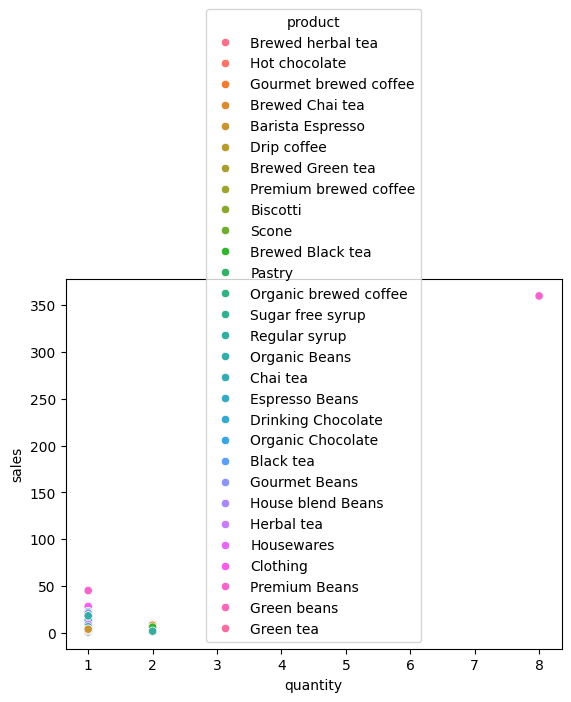

In [18]:
sns.scatterplot(x='quantity',y='sales',hue='product', data=df_hk)

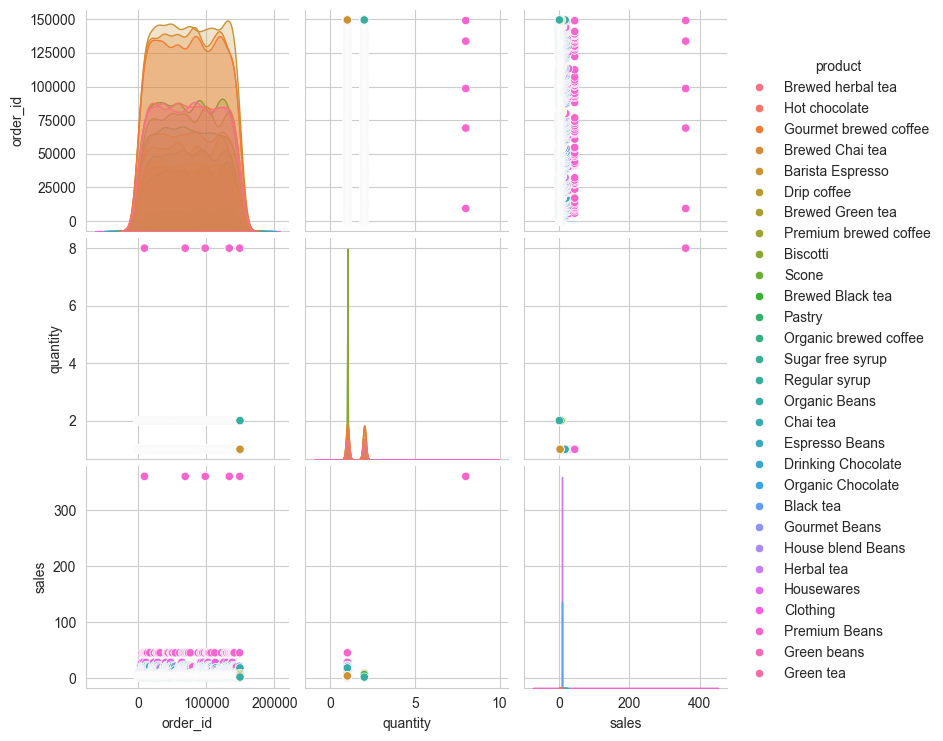

In [19]:
sns.set_style("whitegrid")
sns.pairplot(df_hk, hue="product")
plt.show()

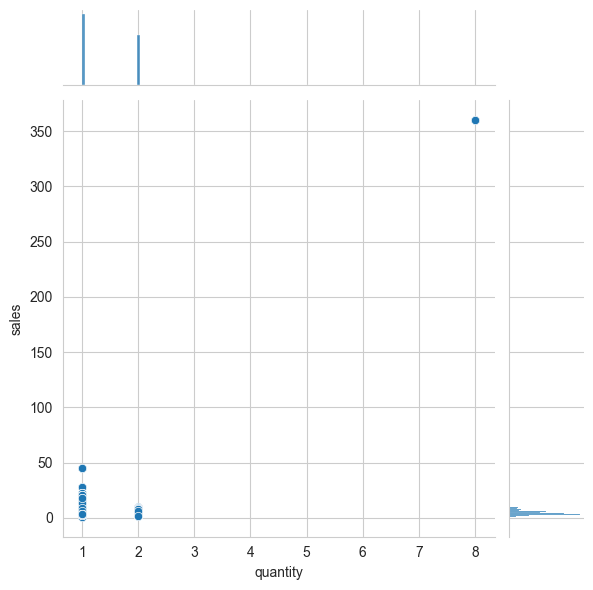

In [20]:
sns.jointplot( x="quantity", y="sales", data=df_hk)


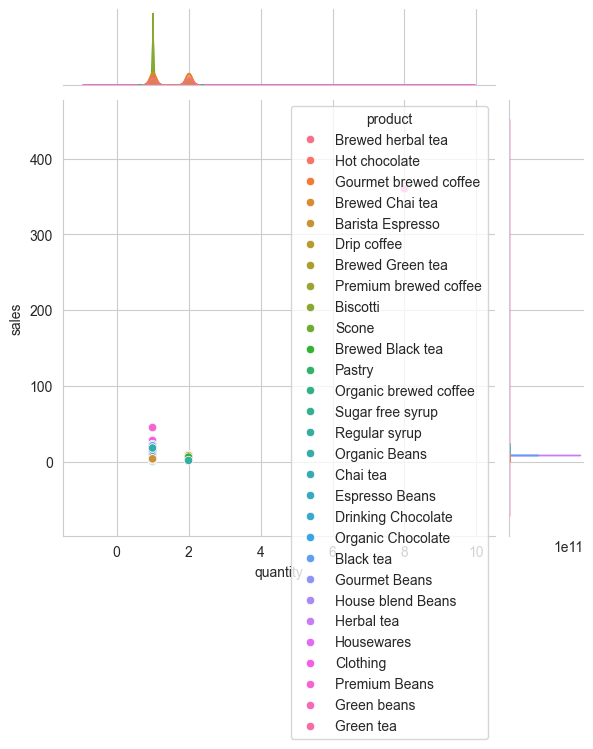

In [21]:
sns.jointplot(x = 'quantity', y = 'sales', data = df_hk, hue='product');

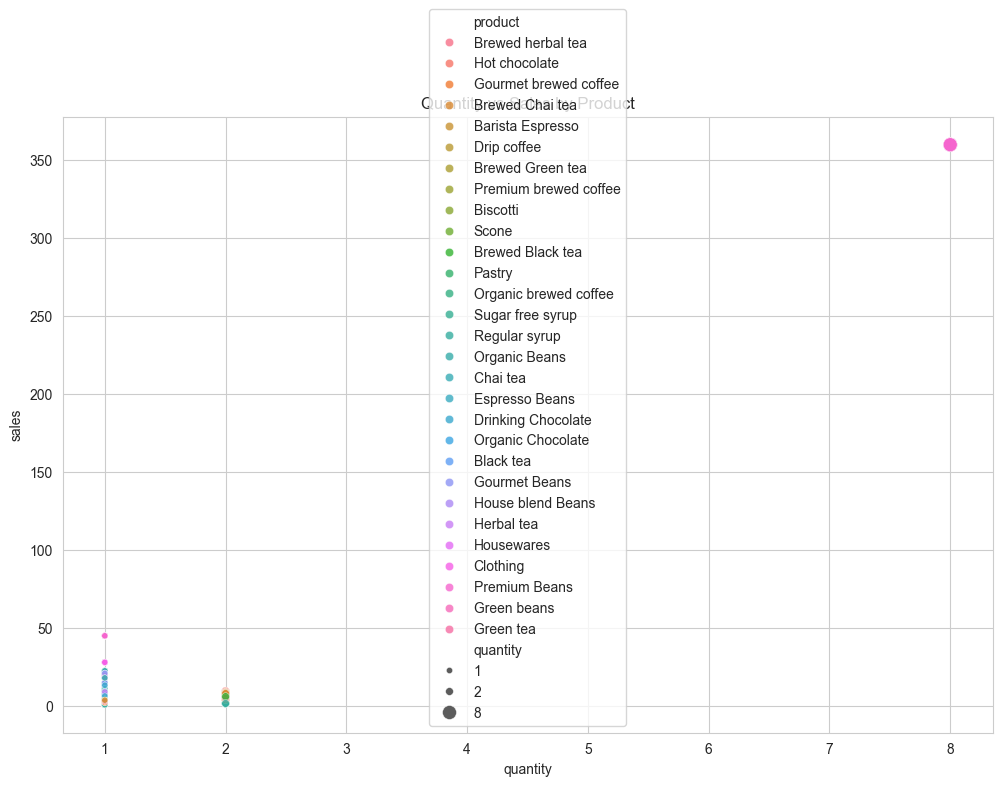

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="quantity",
    y="sales",
    size="quantity",
    sizes=(20,100),
    alpha=0.8,
    hue="product",
    data=df_hk
)
plt.title("Quantity vs Sales by Product")
plt.show()

Conclusion
From working on this assignment, I gained a better understanding of how to process a sales dataset from the initial stage to the analysis stage. The process began with reading the CSV file, examining the content and structure of the data, and then cleaning the data by removing empty values and duplicate data. After that, the data was focused only on the Hell's Kitchen store, in accordance with the assignment requirements, so that the analysis could be more targeted.

In the Exploratory Data Analysis (EDA) stage, I explored the data to understand its characteristics and patterns. EDA was carried out by looking at descriptive statistics and using various visualizations such as histograms, boxplots, violin plots, scatter plots, and heatmaps. This stage helped to determine the distribution of sales values, detect possible outliers, and see the relationship between quantity and sales.

From the EDA results, it can be seen that the quantity of goods sold has an effect on the sales value at the Hell's Kitchen store. This information can be used as initial insight to understand the sales conditions at the store.

Through this assignment, I became more familiar with using libraries such as pandas, matplotlib, and seaborn to perform data analysis. In addition, I also realized that EDA is an important step before performing further analysis or data processing.

Overall, this assignment increased my understanding of the basic flow of data analysis and how to obtain simple insights from sales data, especially at the Hell's Kitchen store.

In [23]:
# plt.figure(figsize=(10,5))
# sns.countplot(
#     y="product",
#     data=df_hk,
#     order=df_hk["product"].value_counts().index
# )
# plt.title("Produk Terlaris Hell's Kitchen")
# plt.show()
#ni produk yang paling sering terjual

In [24]:
# product_sales = df_hk.groupby("product")["sales"].sum()

# product_sales
#total sales nya per produk

In [25]:
# product_sales.sort_values(ascending=False).plot(
#     kind="bar",
#     figsize=(10,5),
#     title="Total Penjualan per Produk"
# )
# plt.show()
#nah kalo ini grafik nya

In [26]:
# df_hk["order_id"] == pd.to_datetime(df_hk["order_id"])
#ngubah kolom date nya jadi format tanggal

In [27]:
# daily_sales = df_hk.groupby("date")["sales"].sum()

# daily_sales.head()
# #ini sales nya per hari

In [28]:
# daily_sales.plot(
#     figsize=(10,5),
#     title="Trend Penjualan Harian Hell's Kitchen"
# )

# plt.show()
# #ini grafik trend per hariannya

In [29]:
# df_hk.to_csv("hells_kitchen_sales_clean.csv", index=False)
